# STOCK MARKET ANAYLSIS

##### PROBLEM STATEMENT: The stock market is inherently volatile, and accurately predicting its movements is crucial for both investors and analysts. With the rise of sophisticated tools and techniques, stock price prediction has become more accessible and reliable. This project aims to leverage historical stock data and advanced time-series models, particularly the ARIMA (AutoRegressive Integrated Moving Average) model, to forecast stock prices for the next five periods. By applying this model to the stocks of companies such as ALEX, BDX, CENT, and DGX, we can provide valuable insights into future market trends and assist stakeholders in making well-informed decisions.

##### The goal of this project is twofold:
##### 1.	Forecast Stock Trends: By predicting the future price movements of these stocks, stakeholders can anticipate market conditions and adjust their investment strategies accordingly. Whether a stock is expected to rise or fall can guide decisions on buying, selling, or holding.
##### 2.	Categorize Risk Levels: By analyzing the volatility and calculating the 5% VaR for each stock, we can categorize the risk level of each company (i.e., low, medium, or high risk). This enables investors to evaluate potential returns alongside the risks associated with each stock, helping them to align their portfolios with their risk tolerance

#     

#### Importing necessary libraries

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import warnings


warnings.filterwarnings("ignore")

#### Load the dataset from CSV files

In [7]:
alex_df = pd.read_csv('ALEX.csv')
bdx_df = pd.read_csv('BDX.csv')
cent_df = pd.read_csv('CENT.csv')
dgx_df = pd.read_csv('DGX.csv')

#### Function to perform analysis on each stock

####    1. Data Cleaning
####    2. Data Transformation
####    3. Feature Engineering
####    4. Data Visualization
####    5. ARIMA Model for Risk Analysis

In [56]:

# Function to perform analysis on each stock
def analyze_stock(stock_df, stock_name):
    # 1. Data Cleaning
    stock_df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    stock_df.drop_duplicates(inplace=True)  # Remove duplicates

    # Handle outliers (using IQR to remove outliers in 'Close' column)
    Q1 = stock_df['Close'].quantile(0.25)
    Q3 = stock_df['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    stock_df = stock_df[(stock_df['Close'] >= lower_bound) & (stock_df['Close'] <= upper_bound)]

  # 2. Data Transformation
    # Feature scaling (using Min-Max Scaling for 'Volume' column)
    scaler = MinMaxScaler()
    stock_df['Volume_scaled'] = scaler.fit_transform(stock_df[['Volume']])

    # Binning 'Volume' into low, medium, high
    bins = [stock_df['Volume'].min(), stock_df['Volume'].quantile(0.33), stock_df['Volume'].quantile(0.66), stock_df['Volume'].max()]
    labels = ['Low', 'Medium', 'High']
    stock_df['Volume_binned'] = pd.cut(stock_df['Volume'], bins=bins, labels=labels, include_lowest=True)

    # Log transformation (example on 'Volume' column)
    stock_df['Log_Volume'] = np.log1p(stock_df['Volume'])

    # 3. Feature Engineering
    # Creating new features (For example, daily price change)
    stock_df['Price_change'] = stock_df['Close'] - stock_df['Open']

    # Interaction terms (between 'High' and 'Low')
    stock_df['High_Low_interaction'] = stock_df['High'] * stock_df['Low']

   # 4. Data Visualization
    # Convert 'Date' column to datetime for better visualization
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%m/%d/%Y')  

    # Function to plot Open and Close price trends for each stock
    def plot_stock_trend(stock_data, stock_name):
        # Open Price Trend
        plt.figure(figsize=(12, 6))
        plt.plot(stock_data['Date'], stock_data['Open'], color='g', label='Open Price')
        plt.xlabel('Date')
        plt.ylabel('Open Price')
        plt.title(f'Open Price Trend Over Time - {stock_name}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Close Price Trend
        plt.figure(figsize=(12, 6))
        plt.plot(stock_data['Date'], stock_data['Close'], color='b', label='Close Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title(f'Close Price Trend Over Time - {stock_name}')
        plt.legend()
        plt.xticks(rotation =45)
        plt.tight_layout()
        plt.show()
   # Plotting trends for the stock
    plot_stock_trend(stock_df, stock_name)

# 5. ARIMA Model for Risk Analysis
    stock_df.set_index('Date', inplace=True)
    arima_data = stock_df[['Close']]

    # Fit ARIMA model
    model = ARIMA(arima_data, order=(5, 1, 0))  # Adjust order as necessary
    model_fit = model.fit()

    # Summary of the model
    print(f"ARIMA Model Summary for {stock_name}:")
    print(model_fit.summary())

    # Forecasting
    forecast = model_fit.forecast(steps=5)  # Forecasting the next 5 periods
    print(f"Forecast for the next 5 periods for {stock_name}:")
    print(forecast)


 


#### ANALYSIS OF ALEX STOCKS:

#### forecasting the next 5 periods for alex

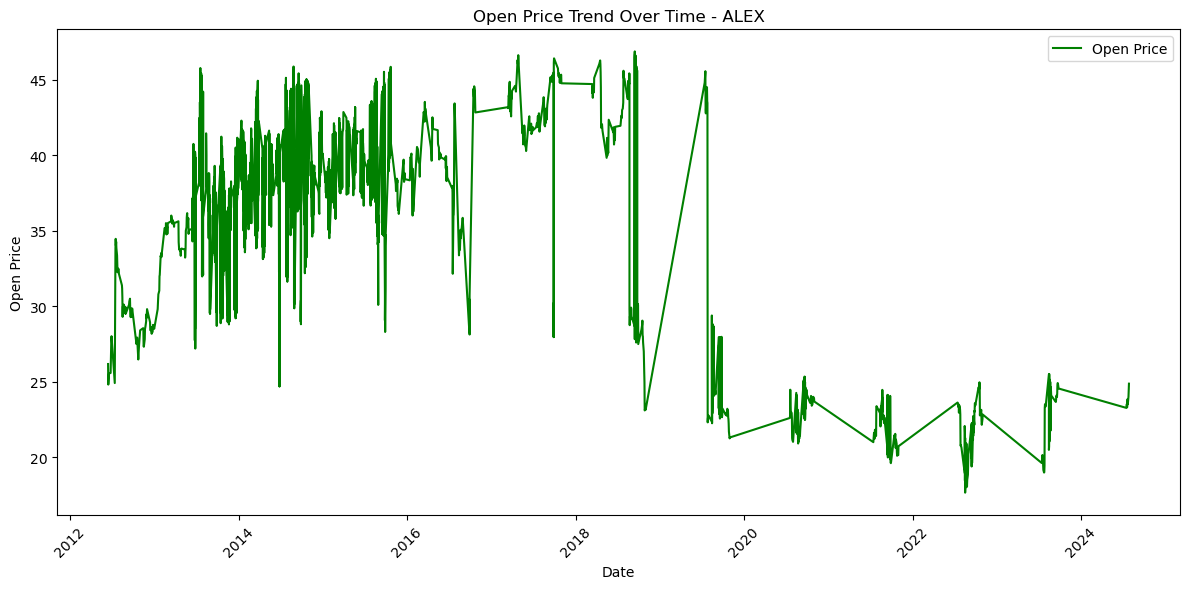

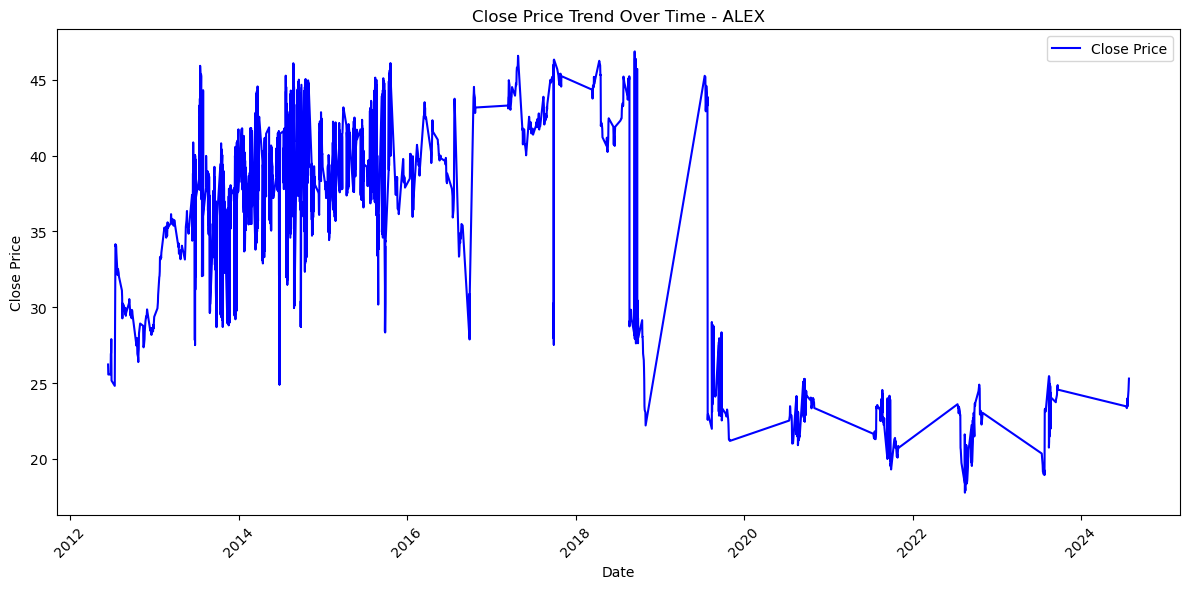

ARIMA Model Summary for ALEX:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1716
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4465.714
Date:                Sun, 17 Nov 2024   AIC                           8943.427
Time:                        23:46:45   BIC                           8976.110
Sample:                             0   HQIC                          8955.521
                               - 1716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7428      0.012    -63.990      0.000      -0.766      -0.720
ar.L2         -0.4466      0.016    -27.613      0.000      -0.478      -0.415
ar.L3         -0.2680 

In [59]:
analyze_stock(alex_df, 'ALEX')

#### ANALYSIS OF BDX STOCKS:

#### forecasting the next 5 periods for bdx

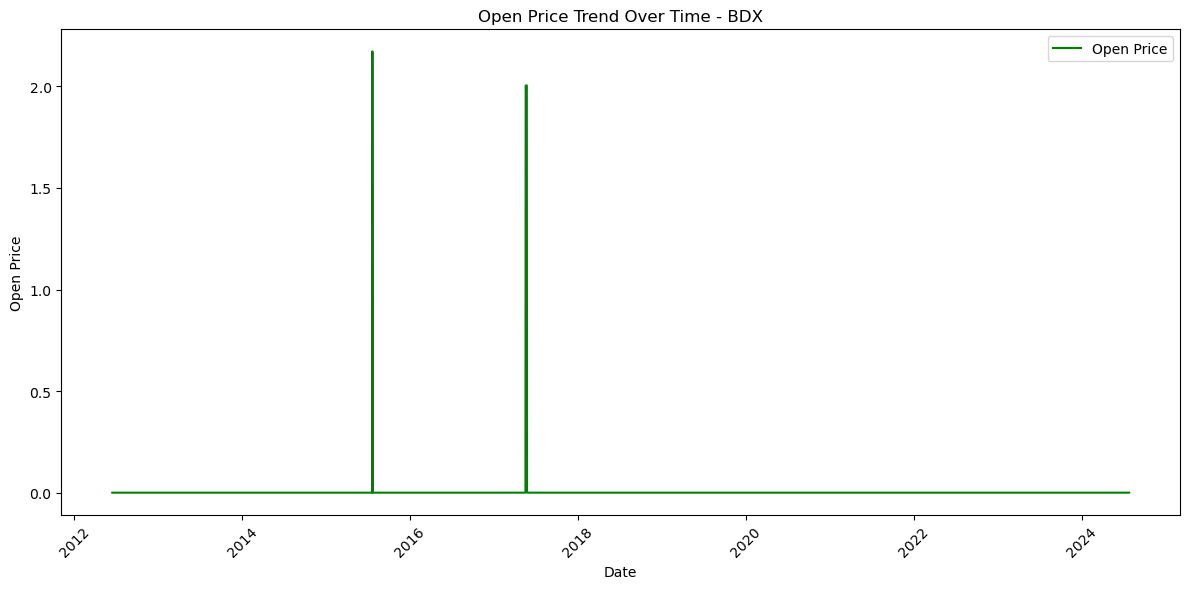

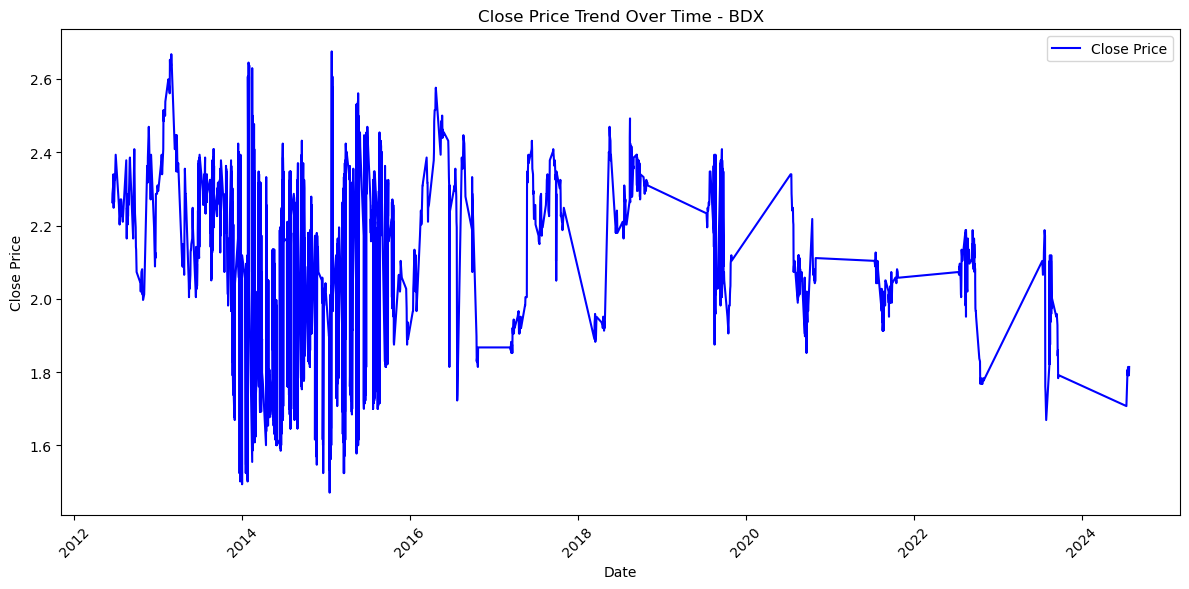

ARIMA Model Summary for BDX:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1693
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 407.543
Date:                Sun, 17 Nov 2024   AIC                           -803.086
Time:                        23:49:14   BIC                           -770.484
Sample:                             0   HQIC                          -791.013
                               - 1693                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9123      0.018    -51.490      0.000      -0.947      -0.878
ar.L2         -0.7212      0.022    -32.250      0.000      -0.765      -0.677
ar.L3         -0.4745  

In [65]:
analyze_stock(bdx_df, 'BDX')

#### ANALYSIS OF CENT STOCKS:

#### forecasting the next 5 periods for cent

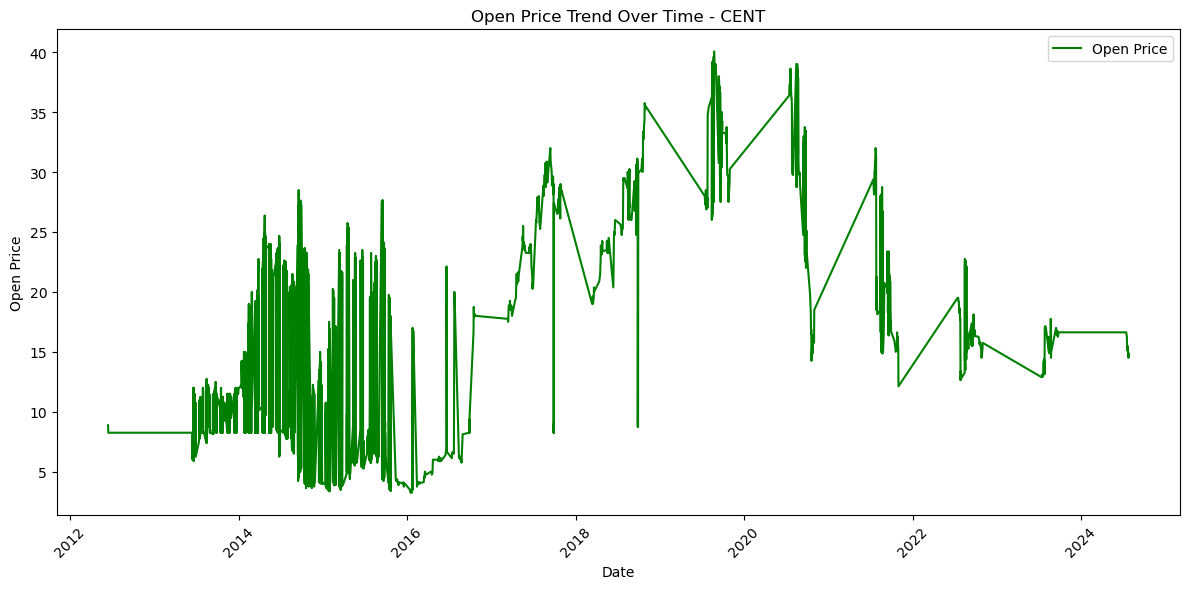

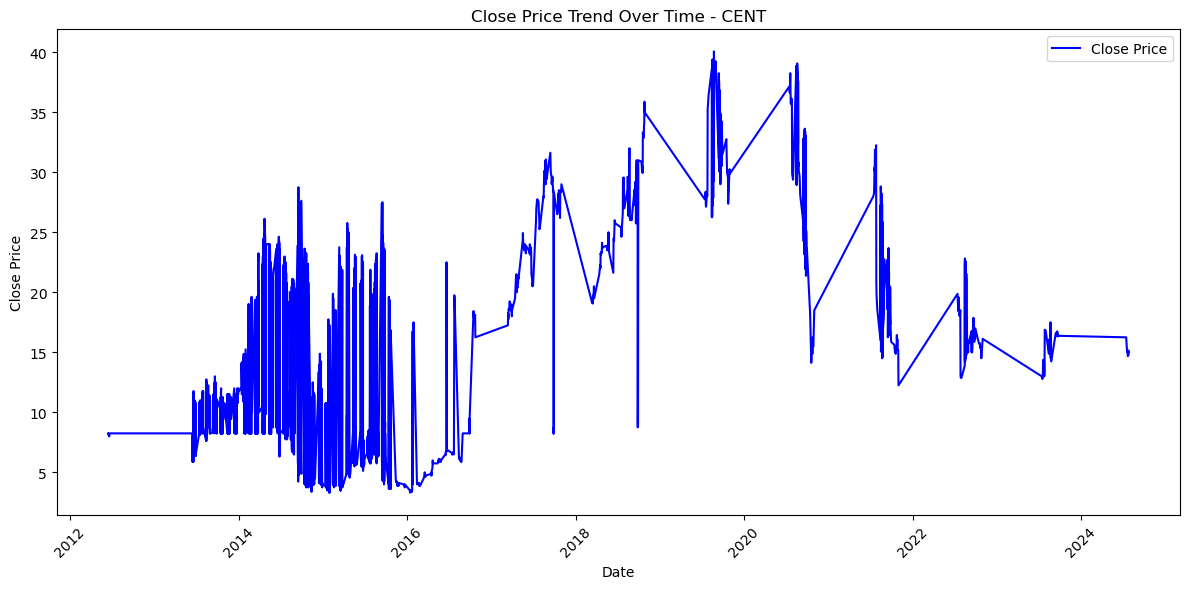

ARIMA Model Summary for CENT:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1716
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5217.078
Date:                Sun, 17 Nov 2024   AIC                          10446.157
Time:                        23:51:02   BIC                          10478.840
Sample:                             0   HQIC                         10458.251
                               - 1716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9682      0.017    -56.876      0.000      -1.002      -0.935
ar.L2         -0.7797      0.022    -36.065      0.000      -0.822      -0.737
ar.L3         -0.5667 

In [68]:
analyze_stock(cent_df, 'CENT')

#### ANALYSIS OF DGX STOCKS:

#### forecasting the next 5 periods for dgx

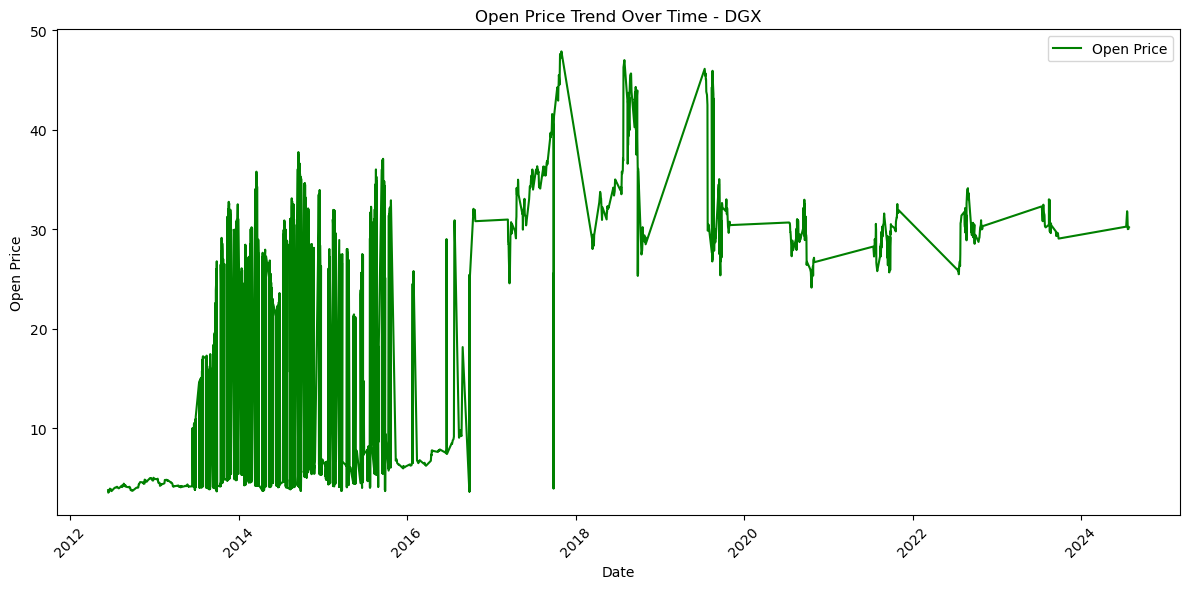

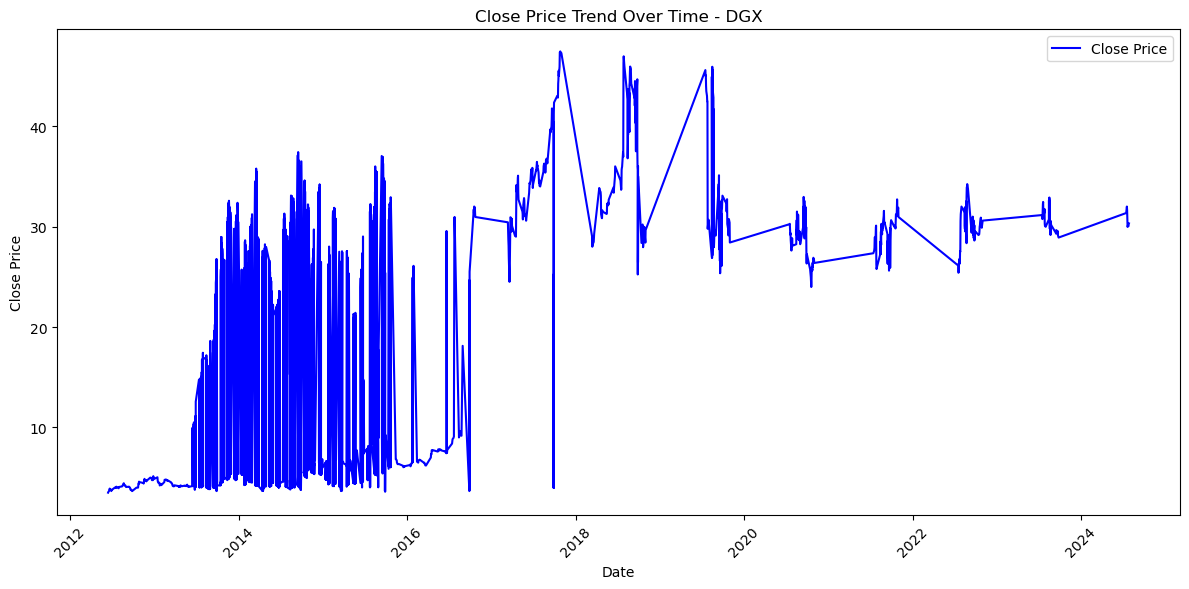

ARIMA Model Summary for DGX:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1716
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6126.162
Date:                Sun, 17 Nov 2024   AIC                          12264.323
Time:                        23:51:30   BIC                          12297.006
Sample:                             0   HQIC                         12276.417
                               - 1716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0808      0.018    -58.478      0.000      -1.117      -1.045
ar.L2         -0.9856      0.025    -39.308      0.000      -1.035      -0.936
ar.L3         -0.7314  

In [71]:
analyze_stock(dgx_df, 'DGX')

##     

#### calculating the risk level and 5% var:

In [58]:
def categorize_risk(returns):
    # Calculate the standard deviation of returns
    volatility = np.std(returns)
    
    # Define risk categories based on volatility
    if volatility < 0.01:  # Low risk
        return 'Low Risk'
    elif 0.01 <= volatility < 0.02:  # Medium risk
        return 'Medium Risk'
    else:  # High risk
        return 'High Risk'

def calculate_var(returns, confidence_level=0.05):
    # Calculate the Value at Risk (VaR)
    return np.percentile(returns, confidence_level * 100)

# Assuming you have DataFrames: alex_df, bdx_df, cent_df, dgx_df
stocks = {
    'ALEX': alex_df,
    'BDX': bdx_df,
    'CENT': cent_df,
    'DGX': dgx_df
}

# Dictionary to hold risk assessment
risk_assessment = {}

for stock_name, df in stocks.items():
    # Calculate daily returns
    df['Returns'] = df['Close'].pct_change().dropna()
    
    # Calculate 5% VaR
    var_5 = calculate_var(df['Returns'].dropna())
    
    # Categorize risk
    risk_level = categorize_risk(df['Returns'].dropna())
    
    # Store results
    risk_assessment[stock_name] = {
        'VaR': var_5,
        'Risk Level': risk_level
    }

# Print risk assessment 
for stock, assessment in risk_assessment.items():
    print(f"Company: {stock}, 5% VaR: {assessment['VaR']:.4f}, Risk Level: {assessment['Risk Level']}")

Company: ALEX, 5% VaR: -0.1700, Risk Level: High Risk
Company: BDX, 5% VaR: -0.2237, Risk Level: High Risk
Company: CENT, 5% VaR: -0.6586, Risk Level: High Risk
Company: DGX, 5% VaR: -0.8362, Risk Level: High Risk
